<a href="https://colab.research.google.com/github/veb-bet/ai_labs/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет: https://www.kaggle.com/datasets/ohinhaque/ocd-patient-dataset-demographics-and-clinical-data

In [42]:
from google.colab import files
uploaded = files.upload()

import os
for dirpath, _, filenames in os.walk('/content/'):
  for filename in filenames:
    print(os.path.join(dirpath, filename))

import pandas as pd

Saving ocd_patient_dataset.csv to ocd_patient_dataset.csv
/content/ocd_patient_dataset.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/logs/2023.11.16/14.26.47.880958.log
/content/.config/logs/2023.11.16/14.26.46.958435.log
/content/.config/logs/2023.11.16/14.23.48.977472.log
/content/.config/logs/2023.11.16/14.20.45.845874.log
/content/.config/logs/2023.11.16/14.26.37.082839.log
/content/.config/logs/2023.11.16/14.23.39.969579.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv


In [43]:
# Чтение через библиотеку Pandas
data = pd.read_csv('/content/ocd_patient_dataset.csv')

In [44]:
# Просмотр содержимого датасета
print(data.head())

   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180               None   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1           

In [45]:
# Обработка и анализ данных
# Шаг 1. Обработка и анализ данных

# Проверка на пропущенные значения
missing_values = data.isnull().sum()
print(missing_values)

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64


In [46]:
# Заполнение пропущенных значений (если необходимо)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Gender'].fillna('Unknown', inplace=True)

In [47]:
# Обработка категориальных переменных
data['Marital Status'] = data['Marital Status'].astype('category')
data['Education Level'] = data['Education Level'].astype('category')
data['Ethnicity'] = data['Ethnicity'].astype('category')

In [48]:
# Отбор признаков
features = ['Age', 'Gender', 'Education Level']
target = 'OCD Diagnosis Date'

data = data[features + [target]]

In [49]:
# Нормализация данных (если необходимо)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Age']] = scaler.fit_transform(data[['Age']])

In [50]:
# Шаг 2. Разделение обучающей выборки на признаки и целевую переменную
X = data[features]
y = data[target]

In [51]:
X_encoded = pd.get_dummies(X, drop_first=True)
# Шаг 3. Обучение модели логистической регрессии
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Шаг 4. Построение прогноза на тестовых данных (если имеются)
y_pred = model.predict(X_test)

In [53]:
# Этап 4. Сохранение результата в новом файле на сервере
result = pd.DataFrame({'Actual Diagnosis Date': y_test, 'Predicted Diagnosis Date': y_pred})
result.to_csv('/content/prediction_result.csv', index=False)

In [54]:
# Этап 5. Скачивание обратно на жесткий диск
files.download('/content/prediction_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
import matplotlib.pyplot as plt

statistics = data.describe()
print(statistics)

               Age
count  1500.000000
mean      0.504936
std       0.295269
min       0.000000
25%       0.245614
50%       0.508772
75%       0.754386
max       1.000000


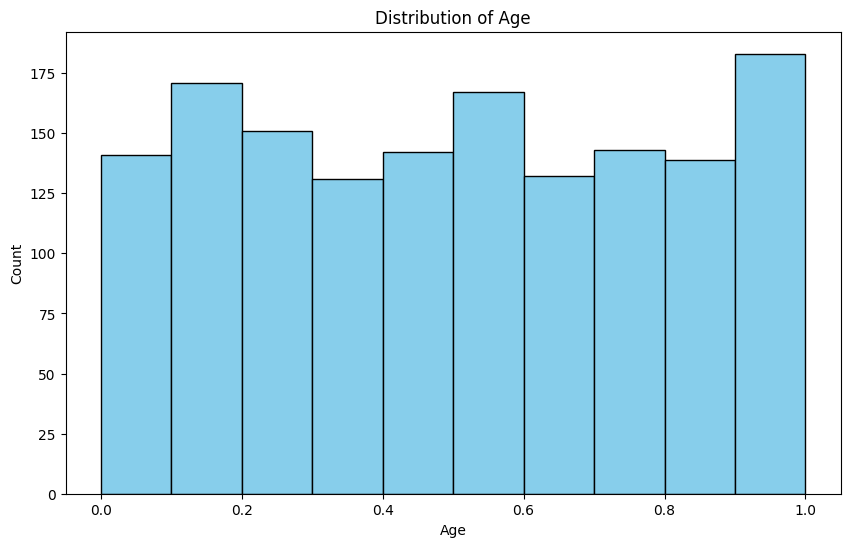

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()